In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
import idx2numpy
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

#Loading and reading data
f1 = '/content/drive/MyDrive/train-images-idx3-ubyte'
f2 = '/content/drive/MyDrive/t10k-images-idx3-ubyte'
f3 = '/content/drive/MyDrive/train-labels-idx1-ubyte'
f4 = '/content/drive/MyDrive/t10k-labels-idx1-ubyte'
trainImages = idx2numpy.convert_from_file(f1)
testImages = idx2numpy.convert_from_file(f2)
trainLabels = idx2numpy.convert_from_file(f3)
testLabels = idx2numpy.convert_from_file(f4)

In [73]:
#EDA
#Image size
imgSize = []
for i in range(len(trainImages)):
	imgStr = str(trainImages[i].shape)
	if(imgStr not in imgSize):
		imgSize.append(imgStr)

print(imgSize)
#Here the imgsize list length came out to be 1 which means all images are of same size
print("Yes, all images are of same size")
print("images dimensions :", trainImages[0].shape)

['(28, 28)']
Yes, all images are of same size
images dimensions : (28, 28)


{9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000}


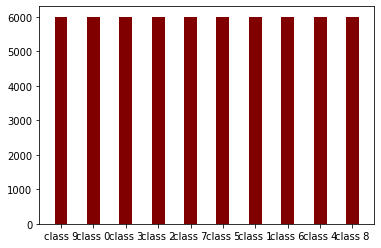

In [74]:
#EDA
#Class Imbalance
countLabelsDict = {}
for i in range(len(trainLabels)):
    if(trainLabels[i] in countLabelsDict.keys()):
        getCount = countLabelsDict[trainLabels[i]]
        countLabelsDict[trainLabels[i]] = getCount+1
    else:
        countLabelsDict[trainLabels[i]] = 1

print(countLabelsDict)

barXAxis = []
barYAxis = []

for k in countLabelsDict.keys():
    barXAxis.append("class " + str(k))
    barYAxis.append(countLabelsDict[k])

plt.bar(barXAxis, barYAxis, color ='maroon', width = 0.4)
plt.show() 

In [75]:
#EDA
#normalization
normalizedImages = []
for i in range(len(trainImages)):
  rows = trainImages[i].shape[0]
  cols = trainImages[i].shape[1]
  newImg = []
  for j in range(rows):
    newL = []
    for k in range(cols):
      newL.append(trainImages[i][j][k]/255)
    newImg.append(newL)
  normalizedImages.append(newImg)

normalizedImages = np.array(normalizedImages)
testImages = np.array(testImages)

[23616498, 477616, 286907, 191709, 131597, 96949, 75610, 61138, 52858, 48514, 46274, 44886, 44885, 46283, 45735, 46711, 45039, 47566, 46710, 46971, 47733, 47792, 48326, 48138, 48987, 49532, 49848, 50022, 49935, 50072, 51863, 51011, 52778, 51508, 53662, 53381, 54386, 53205, 54569, 54075, 55591, 55461, 54597, 55734, 54812, 57583, 56250, 56629, 58381, 56393, 52756, 62900, 58471, 58171, 57973, 60289, 58523, 60188, 59338, 59099, 61320, 60600, 59640, 58578, 61588, 61618, 61618, 58991, 63870, 60733, 63088, 61540, 62224, 63560, 60593, 65295, 62925, 63640, 64095, 63593, 64652, 64854, 64301, 64933, 51808, 76308, 65725, 66889, 65157, 64161, 68260, 65593, 66104, 67969, 66702, 67876, 68340, 68175, 67043, 67354, 69163, 60867, 75601, 69324, 67847, 70404, 69597, 69781, 71638, 69242, 70791, 71627, 71631, 71240, 71425, 72338, 73628, 73821, 71789, 74507, 75676, 73781, 74115, 74994, 74722, 75429, 80315, 61473, 80001, 76392, 77709, 77083, 77990, 77066, 76473, 78503, 81498, 79878, 82063, 78696, 81300, 82063

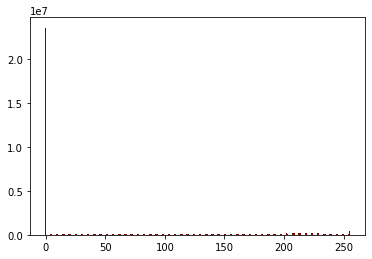

In [76]:
#EDA
#pixel intensity
xPixelAxis = []
yAxisCount = []
for i in range(0,256):
  xPixelAxis.append(i)
  yAxisCount.append(0)

for i in range(len(trainImages)):
  rows = trainImages[i].shape[0]
  cols = trainImages[i].shape[1]
  for j in range(rows):
    for k in range(cols):
      yAxisCount[trainImages[i][j][k]] = yAxisCount[trainImages[i][j][k]] + 1

print(yAxisCount)
plt.bar(xPixelAxis, yAxisCount, color ='maroon', width = 0.4)
plt.show() 

In [ ]:
normalizedImgReshape = np.reshape(normalizedImages, (len(normalizedImages), normalizedImages[0].shape[0]*normalizedImages[0].shape[1]))

In [ ]:
reshapeTrainImages = np.reshape(trainImages, (len(trainImages), trainImages[0].shape[0]*trainImages[0].shape[1]))
print(reshapeTrainImages.shape)

(60000, 784)


In [ ]:
testImages = np.reshape(testImages, (len(testImages), testImages[0].shape[0]*testImages[0].shape[1]))
print(testImages.shape)

(10000, 784)


In [ ]:
#OVR classification
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

labelsModified = []
for i in range(len(countLabelsDict)):
  tempLabels = []
  for j in range(len(trainLabels)):
    if(trainLabels[j]==i):
      tempLabels.append(1)
    else:
      tempLabels.append(0)
  labelsModified.append(tempLabels)

OVRClassifier = LogisticRegression(random_state = 0)

OVRClassifier.fit(reshapeTrainImages, labelsModified[0])
with open('/content/drive/My Drive/classifier0OVR', 'wb') as f:
  pickle.dump(OVRClassifier, f)
pred0 = OVRClassifier.predict(testImages)

OVRClassifier.fit(reshapeTrainImages, labelsModified[1])
with open('/content/drive/My Drive/classifier1OVR', 'wb') as f:
  pickle.dump(OVRClassifier, f)
pred1 = OVRClassifier.predict(testImages)

OVRClassifier.fit(reshapeTrainImages, labelsModified[2])
with open('/content/drive/My Drive/classifier2OVR', 'wb') as f:
  pickle.dump(OVRClassifier, f)
pred2 = OVRClassifier.predict(testImages)

OVRClassifier.fit(reshapeTrainImages, labelsModified[3])
with open('/content/drive/My Drive/classifier3OVR', 'wb') as f:
  pickle.dump(OVRClassifier, f)
pred3 = OVRClassifier.predict(testImages)

OVRClassifier.fit(reshapeTrainImages, labelsModified[4])
with open('/content/drive/My Drive/classifier4OVR', 'wb') as f:
  pickle.dump(OVRClassifier, f)
pred4 = OVRClassifier.predict(testImages)

OVRClassifier.fit(reshapeTrainImages, labelsModified[5])
with open('/content/drive/My Drive/classifier5OVR', 'wb') as f:
  pickle.dump(OVRClassifier, f)
pred5 = OVRClassifier.predict(testImages)

OVRClassifier.fit(reshapeTrainImages, labelsModified[6])
with open('/content/drive/My Drive/classifier6OVR', 'wb') as f:
  pickle.dump(OVRClassifier, f)
pred6 = OVRClassifier.predict(testImages)

OVRClassifier.fit(reshapeTrainImages, labelsModified[7])
with open('/content/drive/My Drive/classifier7OVR', 'wb') as f:
  pickle.dump(OVRClassifier, f)
pred7 = OVRClassifier.predict(testImages)

OVRClassifier.fit(reshapeTrainImages, labelsModified[8])
with open('/content/drive/My Drive/classifier8OVR', 'wb') as f:
  pickle.dump(OVRClassifier, f)
pred8 = OVRClassifier.predict(testImages)

OVRClassifier.fit(reshapeTrainImages, labelsModified[9])
with open('/content/drive/My Drive/classifier9OVR', 'wb') as f:
  pickle.dump(OVRClassifier, f)
pred9 = OVRClassifier.predict(testImages)

preds = [pred0, pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9]


finalPred = []
for j in range(len(pred0)):
  maxProb = -1
  maxProbLabel = -1
  for i in range(len(preds)):
    if(preds[i][j]>maxProb):
      maxProb = preds[i][j]
      maxProbLabel = i
  finalPred.append(maxProbLabel)

accCount = 0
for i in range(len(testLabels)):
  if(testLabels[i]==finalPred[i]):
    accCount = accCount + 1

print("OVR accuracy (in percent)", (100*accCount)/len(testLabels))

OVR accuracy (in percent) 78.33


In [ ]:
import pickle
with open('/content/drive/My Drive/classifier0OVR', 'rb') as f:
  classifier0OVR = pickle.load(f)
with open('/content/drive/My Drive/classifier1OVR', 'rb') as f:
  classifier1OVR = pickle.load(f)
with open('/content/drive/My Drive/classifier2OVR', 'rb') as f:
  classifier2OVR = pickle.load(f)
with open('/content/drive/My Drive/classifier3OVR', 'rb') as f:
  classifier3OVR = pickle.load(f)
with open('/content/drive/My Drive/classifier4OVR', 'rb') as f:
  classifier4OVR = pickle.load(f)
with open('/content/drive/My Drive/classifier5OVR', 'rb') as f:
  classifier5OVR = pickle.load(f)
with open('/content/drive/My Drive/classifier6OVR', 'rb') as f:
  classifier6OVR = pickle.load(f)
with open('/content/drive/My Drive/classifier7OVR', 'rb') as f:
  classifier7OVR = pickle.load(f)
with open('/content/drive/My Drive/classifier8OVR', 'rb') as f:
  classifier8OVR = pickle.load(f)
with open('/content/drive/My Drive/classifier9OVR', 'rb') as f:
  classifier9OVR = pickle.load(f)

pred0 = classifier0OVR.predict(testImages)
pred1 = classifier1OVR.predict(testImages)
pred2 = classifier2OVR.predict(testImages)
pred3 = classifier3OVR.predict(testImages)
pred4 = classifier4OVR.predict(testImages)
pred5 = classifier5OVR.predict(testImages)
pred6 = classifier6OVR.predict(testImages)
pred7 = classifier7OVR.predict(testImages)
pred8 = classifier8OVR.predict(testImages)
pred9 = classifier9OVR.predict(testImages)

preds = [pred0, pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9]
finalPred = []
for j in range(len(pred0)):
  maxProb = -1
  maxProbLabel = -1
  for i in range(len(preds)):
    if(preds[i][j]>maxProb):
      maxProb = preds[i][j]
      maxProbLabel = i
  finalPred.append(maxProbLabel)

accCount = 0
for i in range(len(testLabels)):
  if(testLabels[i]==finalPred[i]):
    accCount = accCount + 1

print("OVR accuracy (in percent)", (100*accCount)/len(testLabels))

OVR accuracy (in percent) 78.33


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

OVRClassifier = OneVsRestClassifier(LogisticRegression(random_state = 0))
OVRClassifier.fit(reshapeTrainImages, trainLabels)

predOVR = OVRClassifier.predict(testImages)

correctCount = 0
for i in range(len(predOVR)):
  if(predOVR[i]==testLabels[i]):
    correctCount = correctCount + 1

with open('/content/drive/My Drive/inbuiltOVR', 'wb') as f:
  pickle.dump(OVRClassifier, f)

print("OVR inbuilt accuracy (in percent)", (100*correctCount)/len(testLabels))

OVR inbuilt accuracy (in percent) 83.83


In [ ]:
with open('/content/drive/My Drive/inbuiltOVR', 'rb') as f:
  inbuiltOVR = pickle.load(f)

predOVR = inbuiltOVR.predict(testImages)

correctCount = 0
for i in range(len(predOVR)):
  if(predOVR[i]==testLabels[i]):
    correctCount = correctCount + 1
print("OVR inbuilt accuracy (in percent)", (100*correctCount)/len(testLabels))

OVR inbuilt accuracy (in percent) 83.83


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
import pickle

finalPredOVO = []
predList = []
c = 0
classifierTemp = LogisticRegression(random_state = 0)
for i in range(len(countLabelsDict)):
  for j in range(i+1, len(countLabelsDict)):
    tempTrainImg = []
    tempTrainLabels = []
    for k in range(len(trainLabels)):
      if(trainLabels[k]==i or trainLabels[k]==j):
        tempTrainImg.append(reshapeTrainImages[k])
        tempTrainLabels.append(trainLabels[k])
    tempTrainImg = np.array(tempTrainImg)
    tempTrainLabels = np.array(tempTrainLabels)
    classifierTemp.fit(tempTrainImg, tempTrainLabels)
    predTemp = classifierTemp.predict(testImages)
    predList.append(predTemp)
    fileNm = "OVOModel" + str(c)
    with open('/content/drive/My Drive/' + fileNm, 'wb') as f:
      pickle.dump(classifierTemp, f)
    c = c+1

finalPred = []
for j in range(len(predList[0])):
  countList = []
  for k in range(len(countLabelsDict)):
    countList.append(0)
  for i in range(len(predList)):
    countList[predList[i][j]] = countList[predList[i][j]] + 1
  maxCount = -1
  maxCountLabel = -1
  for i in range(len(countList)):
    if(countList[i]>maxCount):
      maxCount = countList[i]
      maxCountLabel = i
  finalPred.append(maxCountLabel)
    
accCount = 0
for i in range(len(testLabels)):
  if(testLabels[i]==finalPred[i]):
    accCount = accCount + 1

print("Accuracy (in percent)", (100*accCount)/len(testLabels))


Accuracy (in percent) 83.71


In [ ]:
import pickle

predList = []
for i in range(45):
  fileNm = "OVOModel" + str(i)
  with open('/content/drive/My Drive/' + fileNm, 'rb') as f:
    OVOclassifier = pickle.load(f)
    predTemp = OVOclassifier.predict(testImages)
    predList.append(predTemp)

finalPred = []
for j in range(len(predList[0])):
  countList = []
  for k in range(len(countLabelsDict)):
    countList.append(0)
  for i in range(len(predList)):
    countList[predList[i][j]] = countList[predList[i][j]] + 1
  maxCount = -1
  maxCountLabel = -1
  for i in range(len(countList)):
    if(countList[i]>maxCount):
      maxCount = countList[i]
      maxCountLabel = i
  finalPred.append(maxCountLabel)
    
accCount = 0
for i in range(len(testLabels)):
  if(testLabels[i]==finalPred[i]):
    accCount = accCount + 1

print("Accuracy (in percent)", (100*accCount)/len(testLabels))

Accuracy (in percent) 83.71


In [ ]:
from sklearn.multiclass import OneVsOneClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

OVOClassifier = OneVsOneClassifier(LogisticRegression())
OVOClassifier.fit(reshapeTrainImages, trainLabels)

predOVO = OVOClassifier.predict(testImages)

correctCount = 0
for i in range(len(predOVO)):
  if(predOVO[i]==testLabels[i]):
    correctCount = correctCount + 1

with open('/content/drive/My Drive/inbuiltOVO', 'wb') as f:
  pickle.dump(OVOClassifier, f)

print("inbuilt accuracy", (100*correctCount)/len(testLabels))

inbuilt accuracy 84.09


In [ ]:
with open('/content/drive/My Drive/inbuiltOVO', 'rb') as f:
  inbuiltOVO = pickle.load(f)

predOVO = inbuiltOVO.predict(testImages)
correctCount = 0
for i in range(len(predOVO)):
  if(predOVO[i]==testLabels[i]):
    correctCount = correctCount + 1

print("inbuilt accuracy", (100*correctCount)/len(testLabels))

inbuilt accuracy 84.09


In [2]:
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow

parasitizedFolder = '/content/drive/MyDrive/dataset/Parasitized/Parasitized'

parasitizedImages = []
for filename in os.listdir(parasitizedFolder):
    img = cv2.imread(os.path.join(parasitizedFolder,filename))
    if(img is not None):
      resizeImg = cv2.resize(img, (64, 64), interpolation = cv2.INTER_NEAREST)
      parasitizedImages.append(resizeImg)

parasitizedImages = np.array(parasitizedImages)

uninfectedFolder = '/content/drive/MyDrive/dataset/Uninfected/Uninfected'
uninfectedImages = []
for filename in os.listdir(uninfectedFolder):
  img = cv2.imread(os.path.join(uninfectedFolder,filename))
  if(img is not None):
    resizeImg = cv2.resize(img, (64, 64), interpolation = cv2.INTER_NEAREST)
    uninfectedImages.append(resizeImg)

parasitizedImages = np.array(parasitizedImages)
uninfectedImages = np.array(uninfectedImages)     
print(parasitizedImages.shape)
print(uninfectedImages.shape)

(13779, 64, 64, 3)
(13801, 64, 64, 3)


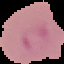

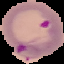

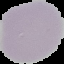

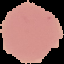

In [3]:
import random
cv2_imshow(random.choice(parasitizedImages))
cv2_imshow(random.choice(parasitizedImages))
cv2_imshow(random.choice(uninfectedImages))
cv2_imshow(random.choice(uninfectedImages))

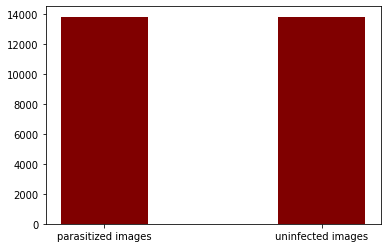

In [4]:
import matplotlib.pyplot as plt
#EDA
#Class Imbalance
barXAxis = ['parasitized images', 'uninfected images']
barYAxis = [parasitizedImages.shape[0], uninfectedImages.shape[0]]
plt.bar(barXAxis, barYAxis, color ='maroon', width = 0.4)
plt.show() 

In [6]:
#1 for parasitized and 0 for uninfected
diseaseLabels = []
for i in range(len(parasitizedImages)):
  diseaseLabels.append(1)
for i in range(len(uninfectedImages)):
  diseaseLabels.append(0)

print(len(diseaseLabels))
diseaseImages = np.concatenate((parasitizedImages, uninfectedImages), axis = 0)
print(diseaseImages.shape)

27580
(27580, 64, 64, 3)


In [20]:
from sklearn.model_selection import train_test_split

x, testImages, y, testLabels = train_test_split(diseaseImages,diseaseLabels,test_size=0.1,train_size=0.9, random_state = 0)
trainImages, cvImages, trainLabels, cvLabels = train_test_split(x,y,test_size = 0.1667,train_size =0.8333, random_state = 0)

trainImages = np.reshape(trainImages, (len(trainImages), trainImages[0].shape[0]*trainImages[0].shape[1]*trainImages[0].shape[2]))
testImages = np.reshape(testImages, (len(testImages), testImages[0].shape[0]*testImages[0].shape[1]*testImages[0].shape[2]))
cvImages = np.reshape(cvImages, (len(cvImages), cvImages[0].shape[0]*cvImages[0].shape[1]*cvImages[0].shape[2]))

In [66]:
from sklearn.neural_network import MLPClassifier
import pickle
MLPClassifier = MLPClassifier(activation='relu',batch_size=128,hidden_layer_sizes=(128,128),learning_rate_init=0.0003, max_iter=75, solver='adam',verbose=True,validation_fraction=0.1667)
MLPClassifier.fit(trainImages, trainLabels)
with open('/content/drive/My Drive/MLPClassifier', 'wb') as f:
  pickle.dump(MLPClassifier, f)
MLPpred = MLPClassifier.predict(testImages)
count = 0
for i in range(len(MLPpred)):
  if(MLPpred[i]==testLabels[i]):
    count = count+1

print("Accuracy (in percent)", (100*count)/len(testLabels))
    

Iteration 1, loss = 3.82919999
Iteration 2, loss = 1.75968810
Iteration 3, loss = 0.88396934
Iteration 4, loss = 0.97260833
Iteration 5, loss = 0.73100708
Iteration 6, loss = 0.76318122
Iteration 7, loss = 0.68002795
Iteration 8, loss = 0.62750587
Iteration 9, loss = 0.61879663
Iteration 10, loss = 0.65689046
Iteration 11, loss = 0.62217468
Iteration 12, loss = 0.61277824
Iteration 13, loss = 0.60732563
Iteration 14, loss = 0.64098506
Iteration 15, loss = 0.61480239
Iteration 16, loss = 0.67875583
Iteration 17, loss = 5.55564183
Iteration 18, loss = 0.71953502
Iteration 19, loss = 0.68668651
Iteration 20, loss = 0.64157770
Iteration 21, loss = 0.63371298
Iteration 22, loss = 0.63797016
Iteration 23, loss = 0.61489955
Iteration 24, loss = 0.61834347
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy (in percent) 65.15591007976795


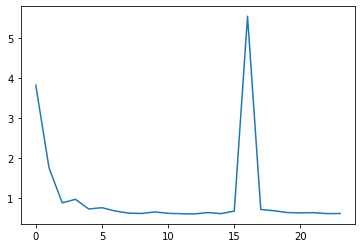

In [67]:
import matplotlib.pyplot as plt
plt.plot(MLPClassifier.loss_curve_)
plt.show()

In [68]:
from sklearn.metrics import f1_score

MLPTrainPred = MLPClassifier.predict(trainImages)
MLPTestPred = MLPClassifier.predict(testImages)
MLPValPred = MLPClassifier.predict(cvImages)

print("train F1 score", f1_score(MLPTrainPred, trainLabels))
print("test F1 score", f1_score(MLPTestPred, testLabels))
print("val F1 score", f1_score(MLPValPred, cvLabels))

train F1 score 0.720344387755102
test F1 score 0.716936671575847
val F1 score 0.7077289886747467


In [70]:
import pickle
with open('/content/drive/My Drive/MLPClassifier', 'rb') as f:
    MLPClassifier = pickle.load(f)
  
MLPpredLoad = MLPClassifier.predict(testImages)
count = 0
for i in range(len(MLPpredLoad)):
  if(MLPpredLoad[i]==testLabels[i]):
    count = count+1

print("Accuracy (in percent)", (100*count)/len(testLabels))

Accuracy (in percent) 65.15591007976795


In [27]:
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])
#df['target'] = data['target']
print(df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [28]:
#EDA
#Normalization
maxValues = df.max()
m = df.shape[0]
n = df.shape[1]

for i in range(m):
  for j in range(n):
    df.iloc[i, j] = df.iloc[i, j]/maxValues[j]

print(df)

      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    0.959541    0.294828  0.752322           0.520000   0.783951   
1    0.890088    0.306897  0.662539           0.373333   0.617284   
2    0.887390    0.406897  0.826625           0.620000   0.623457   
3    0.968982    0.336207  0.773994           0.560000   0.697531   
4    0.892785    0.446552  0.888545           0.700000   0.728395   
..        ...         ...       ...                ...        ...   
173  0.924477    0.974138  0.758514           0.683333   0.586420   
174  0.903574    0.674138  0.767802           0.766667   0.629630   
175  0.894808    0.737931  0.699690           0.666667   0.740741   
176  0.888065    0.446552  0.733746           0.666667   0.740741   
177  0.952798    0.706897  0.848297           0.816667   0.592593   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.721649    0.602362              0.424242         0.639665   
1         0.682990    0.5

{0.0: 59, 1.0: 71, 2.0: 48}


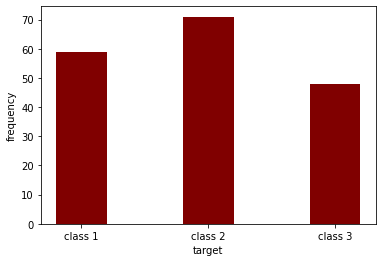

In [29]:
#EDA class imbalance
import matplotlib.pyplot as plt
df['target'] = data['target']
wineUniqueDict = {}
for i in range(m):
  if(df.iloc[i]['target'] in wineUniqueDict):
    getCount = wineUniqueDict.get(df.iloc[i]['target'])
    wineUniqueDict[df.iloc[i]['target']] = getCount + 1
  else:
    wineUniqueDict[df.iloc[i]['target']] = 1

print(wineUniqueDict)

wineYBar = []
for i in range(len(wineUniqueDict)):
  wineYBar.append(0)
for i in wineUniqueDict.keys():
  wineYBar[int(i)] = wineUniqueDict[i]

plt.bar(['class 1', 'class 2', 'class 3'], wineYBar, color ='maroon', width = 0.4)
plt.xlabel("target")
plt.ylabel("frequency")
plt.show()

(array([ 1., 10., 19., 31., 21., 27., 25., 25., 17.,  2.]),
 array([0.74376264, 0.76938638, 0.79501011, 0.82063385, 0.84625759,
        0.87188132, 0.89750506, 0.92312879, 0.94875253, 0.97437626,
        1.        ]),
 <a list of 10 Patch objects>)

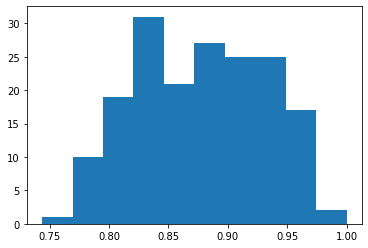

In [30]:
plt.hist(df['alcohol'])

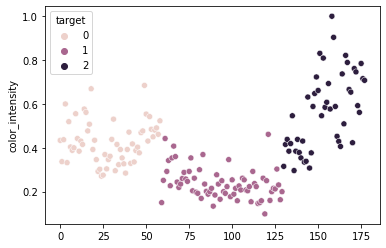

In [31]:
import seaborn as sns
sns.scatterplot(x=df.index, y=df['color_intensity'], hue = df['target'])

In [32]:
df['target'] = data['target']

In [33]:
dfTarget = df['target']

In [34]:
del df['target']

In [35]:
wineData = load_wine()
wineDF = pd.DataFrame(data=wineData['data'],columns=wineData['feature_names'])

In [36]:
wineDF['target'] = wineData['target']

In [37]:
wineDFTarget = wineDF['target']

In [38]:
del wineDF['target']

In [45]:
#Hold out cross-validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

wineTrain1X, wineTest1X, wineTrain1Y, wineTest1Y = train_test_split(wineDF, wineDFTarget, test_size=0.30, random_state=0)
LRmodel = LogisticRegression(multi_class='ovr')
LRmodel.fit(wineTrain1X, wineTrain1Y)
result = LRmodel.score(wineTest1X, wineTest1Y)
print("accuracy (in percent)", 100*result)

accuracy (in percent) 94.44444444444444


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

KFoldVal=KFold(4)
results=cross_val_score(LRmodel,wineDF,wineDFTarget,cv=KFoldVal)
print("accuracy (in percent)", 100*np.mean(results))

accuracy (in percent) 81.50252525252525


In [47]:
#stratified 3 fold cross validation
from sklearn.model_selection import StratifiedKFold

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

SKFoldVal=StratifiedKFold(n_splits=3)

scores=cross_val_score(LRmodel,wineDF,wineDFTarget,cv=SKFoldVal)

print("accuracy (in percent)", 100*np.mean(scores))

accuracy (in percent) 94.41619585687383


In [48]:
#monte carlo cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

ssplit=ShuffleSplit(n_splits=3, test_size=0.30)
results=cross_val_score(LRmodel,wineDF,wineDFTarget,cv=ssplit)

print("accuracy (in percent)", np.mean(results)*100)


accuracy (in percent) 95.06172839506172


In [51]:
from sklearn.model_selection import LeavePOut
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

model=LogisticRegression()

leavePOutVal=LeavePOut(1)

results=cross_val_score(model,wineDF,wineDFTarget,cv=leavePOutVal)

print("accuracy (in percent)", np.mean(results)*100)

accuracy (in percent) 96.06741573033707
